In [128]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import numpy as np

# define the base path so that we won't have to type this over and over
path_base = os.getcwd()
path_base

'/Users/pdas47/courses/cewa564/cewa564_bow'

<AxesSubplot:>

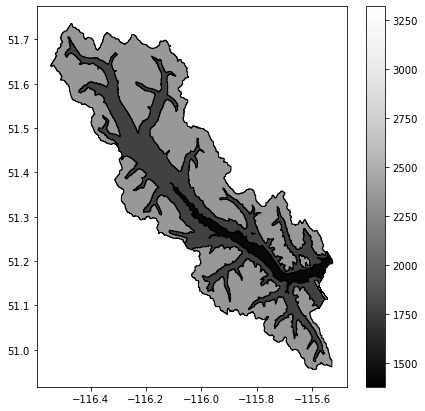

In [25]:
path_shp_lumped_elev = os.path.join(path_base, 'data/bow/topography/lumped_elevationBands/bow_lumped_elevation_zone.shp')
shp_lumped_elev = gpd.read_file(path_shp_lumped_elev)

fig, ax = plt.subplots(figsize=(7,7))

vmin, vmax = 1380,3320 # [m]
shp_lumped_elev.plot(ax=ax, column='hru_elev', facecolor='w', edgecolor='k', cmap='Greys_r', legend=True, vmin=vmin, vmax=vmax)

In [26]:
path_sim_lumped_elev = os.path.join(path_base, 'output/bow/lumped_elevationBands/bow_lumped_elev_default_timestep.nc')
sim_lumped_elev = xr.open_dataset(path_sim_lumped_elev)

In [27]:
sim_lumped_elev

<xarray.Dataset>
Dimensions:               (gru: 1, hru: 3, time: 113929)
Coordinates:
  * time                  (time) datetime64[ns] 2000-10-01 ... 2013-09-30
  * hru                   (hru) int64 1 2 3
  * gru                   (gru) int64 1
Data variables:
    pptrate               (time, hru) float32 ...
    averageInstantRunoff  (time, gru) float32 ...
    averageRoutedRunoff   (time, gru) float32 ...
    scalarSWE             (time, hru) float32 ...
    scalarTotalRunoff     (time, hru) float32 ...
    hruId                 (hru) int64 ...
    gruId                 (gru) int64 ...
Attributes: (12/32)
    summaVersion:     v3.0.3
    buildTime:        Tue Jan  5 00:26:11 UTC 2021
    gitBranch:        tags/v3.0.3-0-g4ee457d
    gitHash:          4ee457df3d3c0779696c6388c67962ba76736df9
    soilCatTbl:       ROSETTA
    vegeParTbl:       MODIFIED_IGBP_MODIS_NOAH
    ...               ...
    snowLayers:       CLM_2010
    compaction:       anderson
    thCondSnow:       jrdn1991
    thCondSoil:       mixConstit
    spatial_gw:       localColumn
    subRouting:       timeDlay

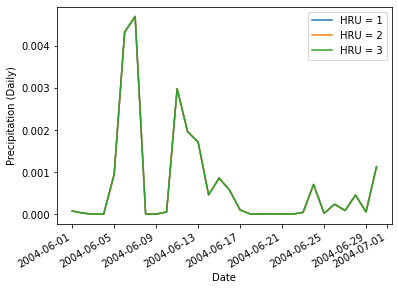

In [74]:
# The precipitation is same everywhere 🥲
frc = xr.open_dataset('./data/bow/forcing/lumped_elevationBands/SUMMA_input_2004-06_lapsed.nc')
fig, ax = plt.subplots()

frc['pptrate'].resample(time='1D').sum(dim='time').sel(hru=0).plot(ax=ax, label='HRU = 1')
frc['pptrate'].resample(time='1D').sum(dim='time').sel(hru=1).plot(ax=ax, label='HRU = 2')
frc['pptrate'].resample(time='1D').sum(dim='time').sel(hru=2).plot(ax=ax, label='HRU = 3')
ax.set_ylabel('Precipitation (Daily)')
ax.set_xlabel('Date')
ax.legend()

Let's see what how the other more detailed datasets look

In [138]:
# The precipitation is same everywhere 🥲 (for elevation lumped)
frc = xr.open_dataset('./data/bow/forcing/distributed/SUMMA_input_2000-10.nc')
ppt = frc.sel(time='2000-10-01').sum(dim='time')[['hruId', 'pptrate']].to_dataframe()

path_shp_distributed = os.path.join(path_base, 'data/bow/topography/distributed/bow_distributed.shp')
shp_distributed = gpd.read_file(path_shp_distributed)
shp_distributed['COMID'] = shp_distributed['COMID'].astype(np.int32)
shp_distributed.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   COMID      51 non-null     int32   
 1   area       51 non-null     float64 
 2   elev_mean  51 non-null     float64 
 3   hru_elev   51 non-null     float64 
 4   geometry   51 non-null     geometry
dtypes: float64(3), geometry(1), int32(1)
memory usage: 1.9 KB


In [139]:
ppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   hruId    51 non-null     int32  
 1   pptrate  51 non-null     float32
dtypes: float32(1), int32(1)
memory usage: 536.0 bytes


In [140]:
res = shp_distributed.merge(ppt.reset_index().set_index('hruId'), left_on='COMID', right_on='hruId')
res.head()

,COMID,area,elev_mean,hru_elev,geometry,hru,pptrate
0,71028597,1.178864e+07,1606.422168,1540.534314,"POLYGON ((-115.62958 51.20292, -115.62292 51.2...",1,0.000000e+00
1,71028609,1.872743e+07,1851.788116,1606.422168,"POLYGON ((-115.64292 51.21042, -115.64208 51.2...",2,1.309572e-12
2,71028676,1.201256e+08,1887.362745,1851.788116,"POLYGON ((-115.76708 51.27125, -115.76125 51.2...",3,3.592837e-09
3,71028700,1.253572e+07,1655.126589,1887.362745,"POLYGON ((-115.80875 51.25625, -115.80792 51.2...",4,0.000000e+00
4,71028740,6.258661e+07,1918.708934,1655.126589,"MULTIPOLYGON (((-115.96292 51.33292, -115.9570...",5,1.425210e-07


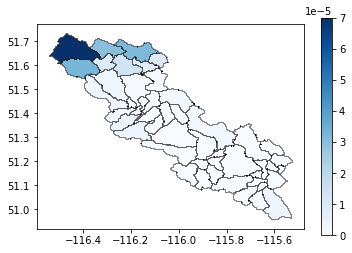

In [153]:
ax = res.plot(column='pptrate', legend=True, label='Precipitation', cmap='Blues', edgecolor='k', linewidth=0.5)